COSTOMER SEGMENTATION : GROUPING CUSTOMER IN VARIOUS CLUSTERS CHARACTERICTS SO THAT YOU CAN TAGET THEM BETTER 

WHY USE CLUSTERING :because we dont have lables (Unsupervise learning)
Poular aglorithm:

1:Kmeans

2:Hierarchical Clustering

3:DBSCAN

TABLE CONTENT 
1: import libaries

2:Laoding libaries

3:Data cleaning

4:Data processing

5:demintional reduction

6:clustering

7:Evaluating models

8:Profiling

9:conclusion

In [9]:

#import  libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

STEP 1 LOADING THE DATA 

In [10]:
data  = pd.read_csv("marketing_campaign-1.xls", sep="\t")
print("Number of data points :", len(data) )
data.head()

Number of data points : 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


STEP 2 DATA CLEANING  & FEATURE ENINGERING

In [11]:
#information features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

above the the code 
1)there are missing values in income 
2)dt_costumer indicate the date a costumer time is not parsed
3)there are come categories features as there are some object. so we need to encode them in the numeric forms later 

In [12]:
#lets remove the misiing values 
data = data.dropna()
print("total number if data points after removing the null are ",len(data))

total number if data points after removing the null are  2216


Finding the first and last customer enrolment dates
In this step, we looked at the column that stores the date each customer joined.
We first made sure all the dates were in the right format so the computer could read them correctly.

Then, we went through the list of dates and picked out only the day, month, and year (ignoring any time information).

Finally, we compared all the dates to find:

The newest date → the most recent customer to join.

The oldest date → the very first customer in the records.

This tells us the time range covered by our customer data.



In [13]:
#CONVERTING DATA TO DATIME FORMAT
#convert the Dt_Customer column to datetime format
#and extract the date from it
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True, errors='coerce')
#check if the conversion was successful
print("The data type of Dt_Customer after conversion is:", data["Dt_Customer"].dtype)
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True, errors='coerce')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The data type of Dt_Customer after conversion is: datetime64[ns]
The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


creating a [Costumer_for ]NOW We check how long a costumer has been here to shop

In [14]:
days = [] #list to store the days between the first/last activity and the recent date
d1 = max(dates) #the recent date 
for i in dates : # loop through the dates 
  delta = d1 - i # calulate the days between the recentg days and the  first/last activity
  days.append(delta)#store it 

data["Costumer_for"] = days
#convert the Costumer_for column to numeric format
data['Costumer_for'] = pd.to_numeric(data['Costumer_for'],errors='coerce')

categories distribution and encoding 

In [15]:
print('total categories of the features Martal_Status:/n', data['Marital_Status'].value_counts())
print("total categories of the features Education:/n",data['Education'].value_counts())

total categories of the features Martal_Status:/n Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
total categories of the features Education:/n Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


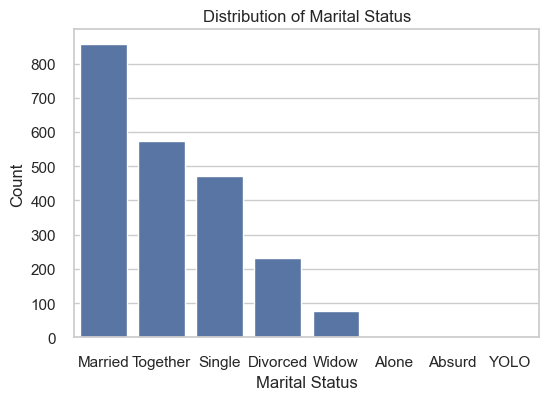

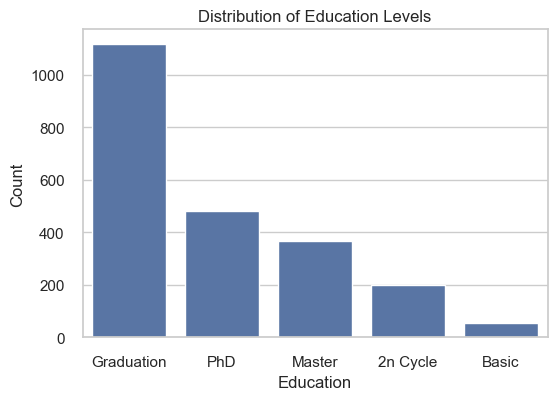

In [16]:

# Set style
sns.set(style="whitegrid")

# Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x="Marital_Status", data=data, order=data['Marital_Status'].value_counts().index)
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

# Education
plt.figure(figsize=(6,4))
sns.countplot(x="Education", data=data, order=data['Education'].value_counts().index)
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()


Why visualize it?
Quickly see imbalances (e.g., 80% “Married”)
Spot rare categories you might merge before encoding
Understand demographic spread for your customer segmentation



In [17]:

# 🔹 Save cleaned dataset for feature engineering
data.to_csv("explored_data.csv", index=False)
print("✅ Data exploration complete. Cleaned dataset saved as 'explored_data.csv'")

✅ Data exploration complete. Cleaned dataset saved as 'explored_data.csv'


🎯 Summary

So in this Data Evaluation file i have:

✅ Data loading & structure check

✅ Missing values handled

✅ Date parsing + new feature (Customer_for)

✅ Distribution check for categorical features (Marital_Status, Education)

✅ Visualization of key categorical variables